Add dataset and check for tables 

In [16]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "dataset.xls"
df = pd.read_excel(file_path, sheet_name=None)  

print(df.keys())


df1 = df["2.2"]
print(df1.head())  

dict_keys(['Cover', 'Sumbols', 'Contents', 'Methodological notes', '1.', '2.1.', '2.2', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '3.10', '3.11', '3.12', '3.13', '3.14', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '6.1', '6.2', '6.3', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '7.10', '7.11', '7.12', '7.13', '7.14', '7.15', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '8.10', '8.11', '8.12', '8.13', '8.14', '8.15', '8.16', '8.17', '8.18', '8.19', '9.1', '9.2'])
  2.2 Population by labor force participation status and education\n  \
0                                             people                   
1                                                NaN                   
2                                                NaN                   
3                                                NaN                   
4                                   All population\n                

1. General Labor Force Participation Rate: In this part i want to analyze general insights about this dataset which include

How has the labor force participation rate changed compared to previous quarters?

Are there notable differences between male and female participation?

Which age groups contribute the most to the labor force?

How does education level impact labor force participation?


In [8]:
df_labor = df['2.1.']

print(df_labor.head())

columns = ["Category", "Total Population", "Labor Force", "Employed Population", "Unemployed Population"]

data = {
    "Category": ["Total", "Men", "Women", "Urban", "Rural"],
    "Total Population": [
        14148747, 6753545, 7395202, 8923697, 5225050
    ],
    "Labor Force": [
        9645294, 4977221, 4668073, 6008081, 3637213
    ],
    "Employed Population": [
        9197046, 4766111, 4430935, 5731350, 3465696
    ],
    "Unemployed Population": [
        448248, 211110, 237138, 276731, 171517
    ]
}

df_extracted = pd.DataFrame(data)


df_extracted["LFPR (%)"] = (df_extracted["Labor Force"] / df_extracted["Total Population"]) * 100 #calculating LFRP

print(df_extracted)

df_extracted.to_excel("extracted_labor_force_data.xlsx", index=False)




                                      2. Labor force Unnamed: 1  \
0  2.1 Population by labor force participation st...        NaN   
1                                             people              
2                                                NaN    Total\n   
3                                                NaN        NaN   
4                                                NaN        NaN   

                         Unnamed: 2             Unnamed: 3  \
0                               NaN                    NaN   
1                               NaN                    NaN   
2  Labor force participation status                    NaN   
3                       labor force            including\n   
4                               NaN  employed population\n   

                Unnamed: 4                               Unnamed: 5  
0                      NaN                                      NaN  
1                      NaN                                      NaN  
2             

With python code extracted needed data for calculation and created seperate table for this task. Calculated LFPR by dividing labor force for total population and did some visualization

  Category  Total Population  Labor Force  Employed Population  \
0    Total          14148747      9645294              9197046   
1      Men           6753545      4977221              4766111   
2    Women           7395202      4668073              4430935   
3    Urban           8923697      6008081              5731350   
4    Rural           5225050      3637213              3465696   

   Unemployed Population   LFPR (%)  
0                 448248  68.170659  
1                 211110  73.697902  
2                 237138  63.122995  
3                 276731  67.327264  
4                 171517  69.611066  


C:\Users\alizh\AppData\Local\Temp\ipykernel_11720\599985914.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Labor Force", data=df, palette="Blues_r")


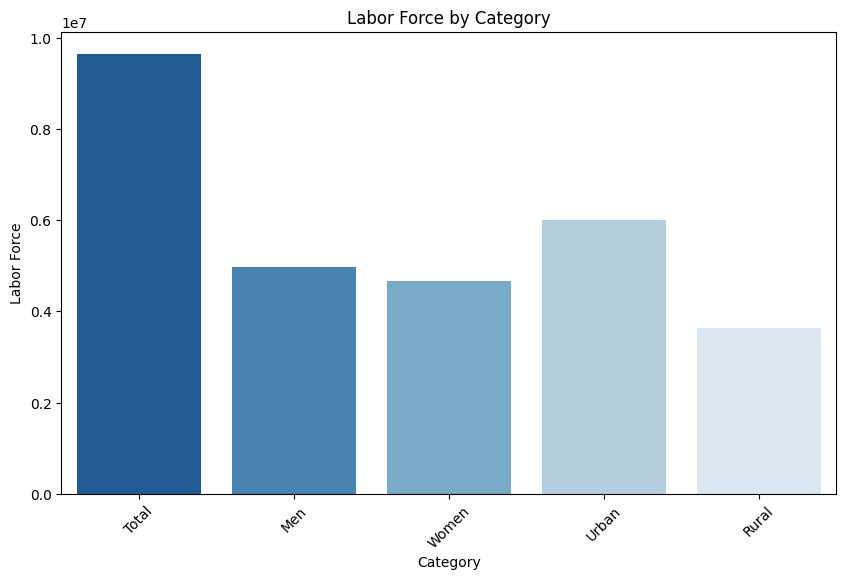

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "extracted_labor_force_data.xlsx" 
df = pd.read_excel(file_path)


print(df.head())

df["LFPR (%)"] = df["LFPR (%)"].astype(float)

plt.figure(figsize=(10, 6))
sns.barplot(x="Category", y="Labor Force", data=df, palette="Blues_r")
plt.title("Labor Force by Category")
plt.ylabel("Labor Force")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()


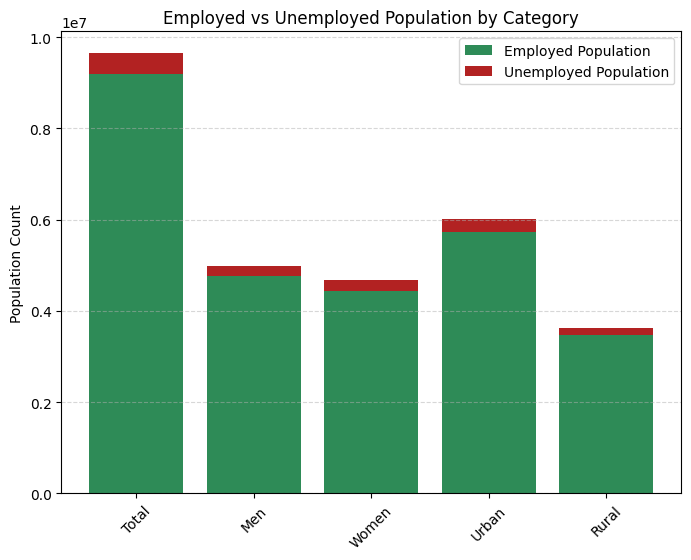

In [20]:
plt.figure(figsize=(8, 6))
categories = df["Category"]
employed = df["Employed Population"]
unemployed = df["Unemployed Population"]

plt.bar(categories, employed, color="seagreen", label="Employed Population")
plt.bar(categories, unemployed, bottom=employed, color="firebrick", label="Unemployed Population")

plt.title("Employed vs Unemployed Population by Category")
plt.ylabel("Population Count")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

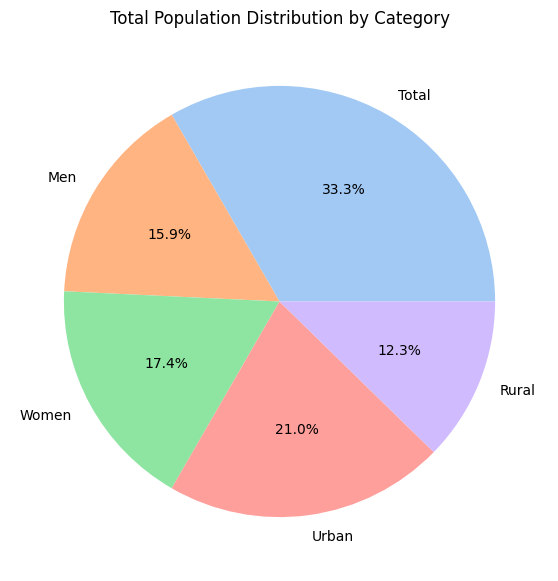

In [21]:
plt.figure(figsize=(7, 7))
plt.pie(df["Total Population"], labels=df["Category"], autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Total Population Distribution by Category")
plt.show()